In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.input_area pre {font-family: Consolas; font-size: 12pt; line-height: 140%;}</style>"))
display(HTML("<style>.output_area pre {font-family: Consolas; font-size: 12pt; line-height: 140%;}</style>"))

In [2]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <비트코인 시세 예측하기>

In [3]:
# Data Source : https://www.blockchain.com/ko/charts/market-price?timespan=60days

file_path = '../data/market-price.csv'
bitcoin_df = pd.read_csv(file_path, names = ['day', 'price'])

In [4]:
bitcoin_df

,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000
5,2017-09-01 00:00:00,4911.740017
6,2017-09-02 00:00:00,4580.387480
7,2017-09-03 00:00:00,4648.159983
8,2017-09-04 00:00:00,4344.098317
9,2017-09-05 00:00:00,4488.720140


### 아래 실행 결과로 보면, 비트코인 데이터는 총 365행으로 이루어져 있고, 결측값 없이 날짜와 가격에 대한 2개의 피처로 구성되어 있다. == 시계열 데이터

In [5]:
# 기본 정보 출력
print(bitcoin_df.shape)
print(bitcoin_df.info())
bitcoin_df.head()

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
day      365 non-null object
price    365 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000


### [시계열 데이터 살펴보기]

In [6]:
bitcoin_df['day'] 

0      2017-08-27 00:00:00
1      2017-08-28 00:00:00
2      2017-08-29 00:00:00
3      2017-08-30 00:00:00
4      2017-08-31 00:00:00
5      2017-09-01 00:00:00
6      2017-09-02 00:00:00
7      2017-09-03 00:00:00
8      2017-09-04 00:00:00
9      2017-09-05 00:00:00
10     2017-09-06 00:00:00
11     2017-09-07 00:00:00
12     2017-09-08 00:00:00
13     2017-09-09 00:00:00
14     2017-09-10 00:00:00
15     2017-09-11 00:00:00
16     2017-09-12 00:00:00
17     2017-09-13 00:00:00
18     2017-09-14 00:00:00
19     2017-09-15 00:00:00
20     2017-09-16 00:00:00
21     2017-09-17 00:00:00
22     2017-09-18 00:00:00
23     2017-09-19 00:00:00
24     2017-09-20 00:00:00
25     2017-09-21 00:00:00
26     2017-09-22 00:00:00
27     2017-09-23 00:00:00
28     2017-09-24 00:00:00
29     2017-09-25 00:00:00
              ...         
335    2018-07-28 00:00:00
336    2018-07-29 00:00:00
337    2018-07-30 00:00:00
338    2018-07-31 00:00:00
339    2018-08-01 00:00:00
340    2018-08-02 00:00:00
3

In [7]:
#to_datetime으로 day피처를 시계열 피처로 변환
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])

In [8]:
#day 데이터 프레임의 index로 설정
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace=True)

In [9]:
#즉, 시계열 정보를 데이터 프레임의 index로 설정하여 가격의 추이를 시각화
bitcoin_df.head()

,price
day,
2017-08-27,4354.308333
2017-08-28,4391.673517
2017-08-29,4607.985450
2017-08-30,4594.987850
2017-08-31,4748.255000


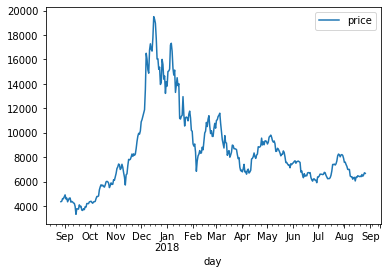

In [10]:
#일자별 비트코인 시세를 시각화
bitcoin_df.plot()
plt.show()

# <Step2. 예측> : 파이썬 라이브러리를 활용한 시세 예측

### [ARIMA 모델 활용하기]
###### ARIMA 모델 학습

In [11]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

### ARIMA는 전통적인 시계열 예측 방법으로 크게 두 가지 개념을 포함하고 있음
#### AR(autoregression), 자기 자신의 과거를 정보로 사용하는 개념 / MA(moving average) 이전 항에서의 오차를 이용하여 현재 항의 상태를 추론하는 방법
#### 이 둘을 합친 것이 ARMA 모델, 조금 더 나아간 것이 ARIMA 모델
#### ARIMA 모델은 ARMA 모델에 추세 변동의 경향성까지 반영한 방법

### 아래 코드에서, order=(2,1,2) 파라미터는 AR이 몇 번째 과거까지를 바라보는지에 대한 파라미터(2), 차분(Difference)에 대한 파라미터(1), MA가 몇 번째 과거까지를 바라보는지에 대한 파라미터(2)를 의미하는 것.
#### 차분이란 현재 상태의 변수에서 바로 전 상태의 변수를 빼주는 것을 의미하며, 시계열 데이터의 불규칙성을 조금이나마 보정해주는 역할을 한다. 또한 ARIMA 모델의 경향성을 의미

In [12]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델 학습
model = ARIMA(bitcoin_df.price.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2780.074
Method:                       css-mle   S.D. of innovations            501.535
Date:                Thu, 27 Aug 2020   AIC                           5572.148
Time:                        13:56:45   BIC                           5595.531
Sample:                             1   HQIC                          5581.442
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4490     26.945      0.239      0.811     -46.362      59.260
ar.L1.D.y      0.4496      0.029     15.536      0.000       0.393       0.506
ar.L2.D.y     -0.9623      0.023    -42.339      0.0

### 위 실행 결과에서, 상수항을 제외한 모든 계수의 p-value가 0.05이하로 유의미한 것으로 나타남. 이는 AR, MA 모두 2로 설정하는 것이 꽤나 의미 있는 분석 결과를 도출한다는 것.

-----

###### 모델의 성능 & 예측 결과 시각화
- 학습한 모델이 학습 데이터에 대해서 예측한 결과만을 시각화합니다.

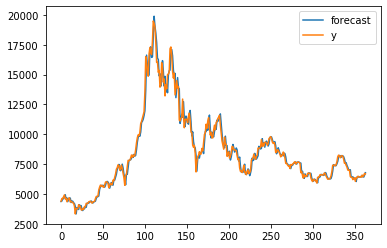

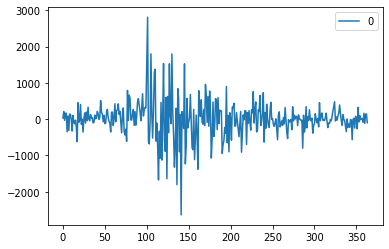

In [13]:
 # 학습 데이터에 대한 예측 결과 (첫번째 그래프)
fig = model_fit.plot_predict()
 # 잔차의 변동 시각화 (두번째 그래프)
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

### 첫 번째 그래프는 학습한 모델에 학습 데이터셋을 넣었을 때의 시계열 예측 결과
### 두 번째 그래프는 실제값과 예측값 사이의 오차 변동을 나타내는 그래프 - 폭이 일정하지 않으므로 오차 변동이 매우 불안정한 것으로 보임.

In [14]:
#학습 데이터셋으로부터 5일 뒤를 예측
forecast_data = model_fit.forecast(steps=5)

In [15]:
#test 데이터셋을 불러옴.
test_file_path = '../data/market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

In [16]:
forecast_data

(array([6667.4501814 , 6624.65576455, 6620.77536536, 6669.96525847,
        6705.56945302]),
 array([ 501.53529375,  731.11635871,  905.45563555, 1037.17391827,
        1147.53255342]),
 array([[5684.45906867, 7650.44129413],
        [5191.69403296, 8057.61749613],
        [4846.11493009, 8395.43580064],
        [4637.14173295, 8702.78878399],
        [4456.44697722, 8954.69192882]]))

In [17]:
forecast_data[2]

array([[5684.45906867, 7650.44129413],
       [5191.69403296, 8057.61749613],
       [4846.11493009, 8395.43580064],
       [4637.14173295, 8702.78878399],
       [4456.44697722, 8954.69192882]])

In [18]:
#마지막 5일의 예측 데이터(2018-08-27 ~ 2018-08-31)
pred_y = forecast_data[0].tolist()
#실제 5일 가격 데이터
test_y = bitcoin_test_df.y.values
#마지막 5일의 예측 데이터의 최솟값과 최대값
pred_y_lower = []
pred_y_upper = []
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

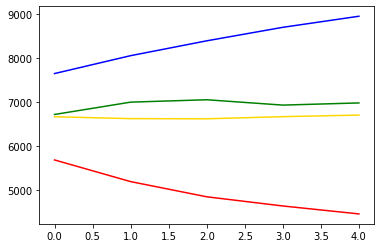

In [19]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프
plt.plot(test_y, color="green") # 실제 가격 그래프

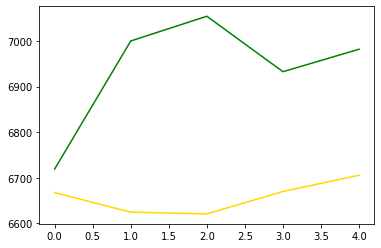

In [20]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프
plt.plot(test_y, color="green") # 실제 가격 그래프

- test RMSE 점수

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

308.8414844209386


### [Facebook Prophet 활용하기]

###### Prophet 모델 학습

In [22]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [23]:
# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 한다 : 'ds', 'y'
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

###### 모델로부터 예측할 기간을 정의하고, 결과를 도출.

In [24]:
# 5일을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)

In [25]:
forecast_data.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2017-08-27,463.291162,3803.278422,5100.633375,463.291162,463.291162,9.768415,9.768415,9.768415,8.663307,...,-0.035764,-0.035764,-0.035764,-1.069344,-1.069344,-1.069344,0.0,0.0,0.0,4476.924830
1,2017-08-28,466.327174,3884.348613,5207.678807,466.327174,466.327174,9.768415,9.768415,9.768415,8.733948,...,-0.006875,-0.006875,-0.006875,-1.027593,-1.027593,-1.027593,0.0,0.0,0.0,4539.204526
2,2017-08-29,469.363186,3950.433671,5272.155744,469.363186,469.363186,9.768415,9.768415,9.768415,8.783438,...,0.019376,0.019376,0.019376,-1.004353,-1.004353,-1.004353,0.0,0.0,0.0,4591.985651
3,2017-08-30,472.399197,3954.863982,5252.527107,472.399197,472.399197,9.768415,9.768415,9.768415,8.718626,...,-0.047307,-0.047307,-0.047307,-1.002482,-1.002482,-1.002482,0.0,0.0,0.0,4591.071189
4,2017-08-31,475.435209,4015.683674,5304.903667,475.435209,475.435209,9.768415,9.768415,9.768415,8.723303,...,-0.020907,-0.020907,-0.020907,-1.024205,-1.024205,-1.024205,0.0,0.0,0.0,4622.800825


In [26]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(5)

,ds,yhat,yhat_lower,yhat_upper
0,2017-08-27,4476.924830,3803.278422,5100.633375
1,2017-08-28,4539.204526,3884.348613,5207.678807
2,2017-08-29,4591.985651,3950.433671,5272.155744
3,2017-08-30,4591.071189,3954.863982,5252.527107
4,2017-08-31,4622.800825,4015.683674,5304.903667


###### 결과의 시각화
- 전체 데이터를 기반으로 학습한, 5일 단위의 예측 결과를 시각화합니다.

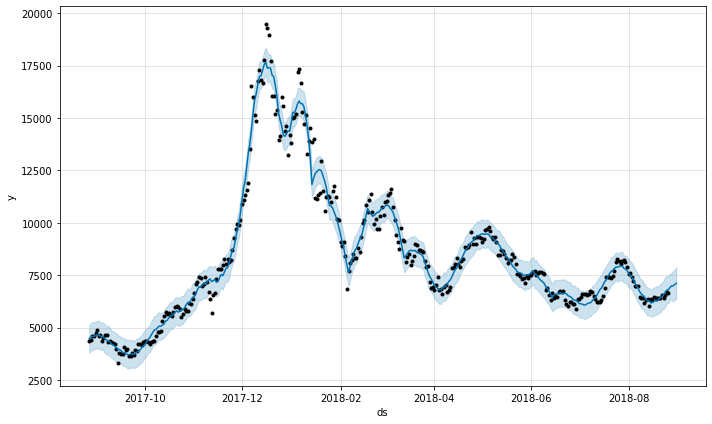

In [29]:
fig1 = prophet.plot(forecast_data)
#검은 점은 실제 가격, 파란 선은 예측 가격

- seasonality_mode로 설정했었던 기간별 트렌드 정보를 시각화합니다.

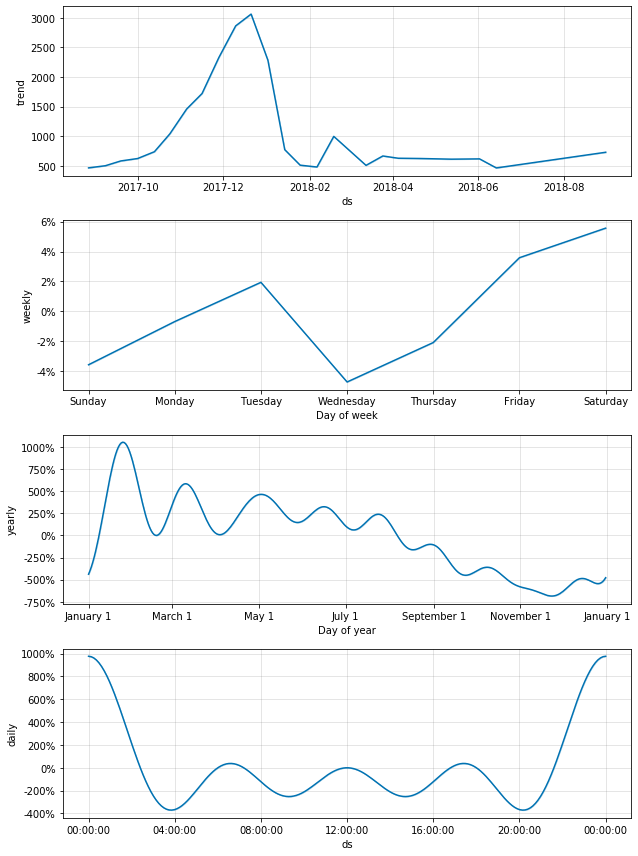

In [30]:
fig2 = prophet.plot_components(forecast_data)
#시계열 데이터가 어떤 흐름을 가지고 변화하는지 살펴볼 수 있다. 전체적인 데이터의 트렌드는 첫 번째 그래프, 이어서 year, weekly, daily 순의 트렌드를 확인

###### 모델의 성능
- 실제 가격과 예측한 가격간의 차이 : 첫 5일과 마지막 5일은 제외하고 계산합니다.
- train RMSE 점수 : 521.5
- train r2 점수 (train 데이터에 대한 모델의 설명력) : 0.97

In [32]:
y = bitcoin_df.y.values[5:] # 첫 5일을 제외한 실제 가격 데이터
y_pred = forecast_data.yhat.values[5:-5] # 첫 5일, 마지막 5일을 제외한 예측 가격 데이터

In [33]:
rmse = sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(rmse)
print(r2)

521.5431164916916
0.9738535999689419


###### 실제 데이터와의 비교
- 예측 결과인 마지막 5일의 예측값을 실제 데이터와 비교해봅니다.
- 5일 후의 실제 데이터는 `'../data/market-price-test.csv'` 에서 불러올 수 있습니다. 데이터를 직접 다운로드

In [34]:
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

pred_y = forecast_data.yhat.values[-5:] # 마지막 5일의 예측 데이터 (2018-08-27 ~ 2018-08-31)
test_y = bitcoin_test_df.y.values # 실제 5일 가격 데이터 (2018-08-27 ~ 2018-08-31)
pred_y_lower = forecast_data.yhat_lower.values[-5:] # 마지막 5일의 예측 데이터의 최소값
pred_y_upper = forecast_data.yhat_upper.values[-5:] # 마지막 5일의 예측 데이터의 최대값

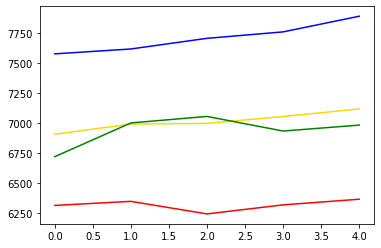

In [35]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프
plt.plot(test_y, color="green") # 실제 가격 그래프

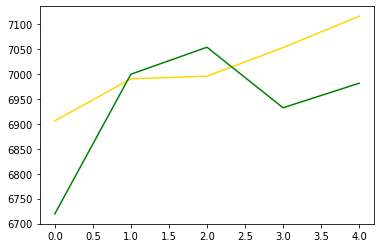

In [36]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프
plt.plot(test_y, color="green") # 실제 가격 그래프

- test RMSE 점수

In [37]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

119.31816196977144


# <Step3. 활용> : 더 나은 결과를 위한 방법들

### [상한가 및 하한가 선정]
- 주가데이터의 경우 의미가 없지만, 일반적인 시계열 데이터의 경우 상한값 혹은 하한값을 잘 설정해주는 것이 모델의 성능을 높여줄 수 있는 방법 중 하나이다.


In [38]:
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])

# 상한가 설정
bitcoin_df['cap'] = 20000

# 상한가 적용을 위한 파라미터 설정
prophet = Prophet(seasonality_mode='multiplicative', 
                  growth='logistic',
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

In [39]:
# 5일을 내다보며 예측
future_data = prophet.make_future_dataframe(periods=5, freq='d')

# 상한가 설정
future_data['cap'] = 20000
forecast_data = prophet.predict(future_data)

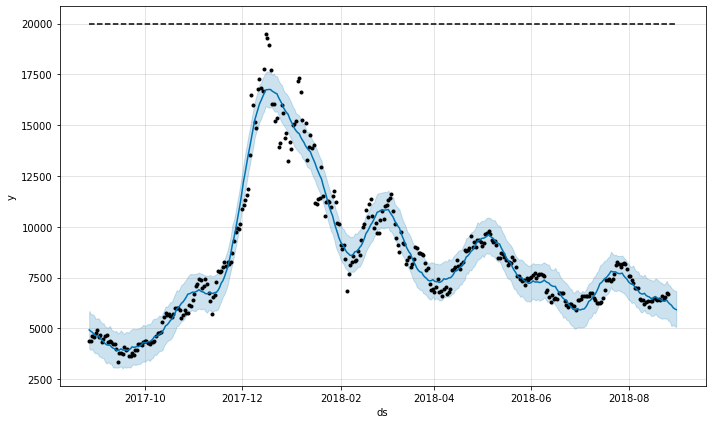

In [40]:
fig = prophet.plot(forecast_data)

###### 실제 데이터와의 비교
- 비트코인 데이터의 경우, 상한선을 둠으로써 오히려 예측력이 다소 떨어지는 결과를 보임

In [41]:
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

# 모델이 예상한 마지막 5일의 가격 데이터를 가져온다.
pred_y = forecast_data.yhat.values[-5:]
test_y = bitcoin_test_df.y.values
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

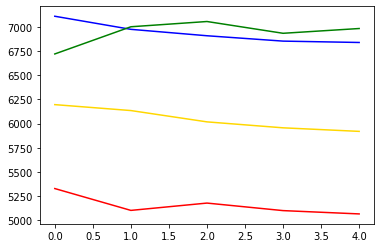

In [42]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프
plt.plot(test_y, color="green") # 실제 가격 그래프

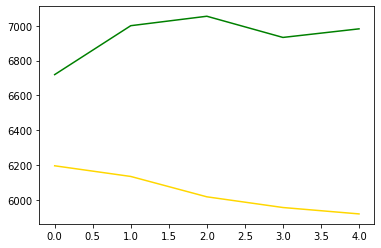

In [43]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프
plt.plot(test_y, color="green") # 실제 가격 그래프

- test RMSE 점수

In [44]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

914.0246699824928


### [이상치 제거하기]
- 가격이 18000을 넘어가는 값을 이상치로 판단하여 제거

In [45]:
# 18000 이상의 데이터는 이상치라고 판단
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])
bitcoin_df.loc[bitcoin_df['y'] > 18000, 'y'] = None

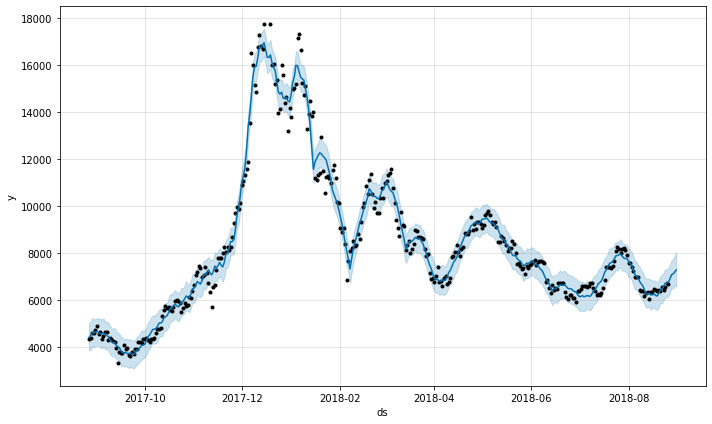

In [46]:
# prophet 모델을 학습
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

# 5일단위의 미래를 예측
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)

# 예측 결과를 그래프로 출력
fig = prophet.plot(forecast_data)

###### 실제 데이터와의 비교
- 비트코인 데이터의 경우, 이상치를 제거함으로써 오히려 예측력이 다소 떨어지는 결과를 보인다.
- 모델의 정확도 스코어 측면에서는 떨어졌지만, 트렌드 예측의 측면에서는 다소 나은 모습을 보여줄 수도 있다.

In [47]:
bitcoin_test_df = pd.read_csv(test_file_path, names = ['ds', 'y'])

# 모델이 예상한 마지막 5일의 가격 데이터를 가져온다.
pred_y = forecast_data.yhat.values[-5:]
test_y = bitcoin_test_df.y.values
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

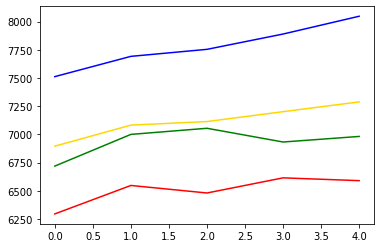

In [48]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프
plt.plot(test_y, color="green") # 실제 가격 그래프

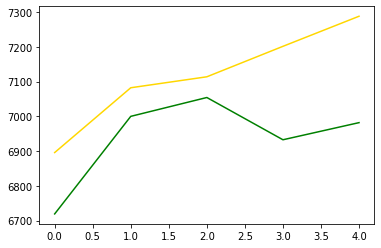

In [49]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프
plt.plot(test_y, color="green") # 실제 가격 그래프

### 이상치를 제거하는 것이 정확도(RMSE)면에서는 떨어지지만 '트렌드'를 예측하는 측면에서는 이전 모델보다 더 낫다고 볼 수 있다.